# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Pandas](#Section-1)
- [Section 2 &ndash; Data Wrangling](#Section-2)
- [Section 3 &ndash; Data Visualization](#Section-3)

--- 

### Section 1

#### Exercise 1.1
##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [129]:
import pandas as pd
df = pd.read_csv("2019_Yellow_Taxi_Trip_Data.csv")
df[:5]

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


#### Exercise 1.2
##### Find the dimensions (number of rows and number of columns) in the data.

In [130]:
df.shape

(10000, 18)

#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [131]:
df[["fare_amount", "tip_amount", "tolls_amount", "total_amount"]].sum()

fare_amount     151063.13
tip_amount       26344.94
tolls_amount      6234.47
total_amount    225646.59
dtype: float64

#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [132]:
df.iloc[df["trip_distance"].idxmax(axis=0)][["fare_amount", "tip_amount", "tolls_amount", "total_amount", "trip_distance"]]

fare_amount       176.0
tip_amount        18.29
tolls_amount       6.12
total_amount     201.21
trip_distance     38.11
Name: 8338, dtype: object

---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [133]:
df2 = pd.read_csv("Meteorite_Landings.csv").rename(columns={"mass (g)": "mass"}).drop(columns=["reclat", "reclong"]).sort_values(by=["mass"], ascending=[False])
df2

,name,id,nametype,recclass,mass,fall,year,GeoLocation
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM,"(-19.58333, 17.91667)"
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM,"(76.13333, -64.93333)"
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM,"(-27.46667, -60.58333)"
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM,"(35.05, -111.03333)"
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM,"(47.0, 88.0)"
...,...,...,...,...,...,...,...,...
38282,Wei-hui-fu (a),24231,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM,NaN
38283,Wei-hui-fu (b),24232,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM,NaN
38285,Weiyuan,24233,Valid,Mesosiderite,NaN,Found,01/01/1978 12:00:00 AM,"(35.26667, 104.31667)"
41472,Yamato 792768,28117,Valid,CM2,NaN,Found,01/01/1979 12:00:00 AM,"(-71.5, 35.66667)"


#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [134]:
cleanedDf = df2.copy()
cleanedDf['year'] = cleanedDf['year'].apply(lambda x: int(x[6:11]) if isinstance(x, str) else x)
# cleanedDf['year'] = cleanedDf['year'].map(lambda x: x[6:11], na_action='ignore')
cleanedDf['before_1970'] = cleanedDf['year'].map(lambda y: y < 1970)
cleanedDf.set_index('id', inplace=True)

rows = cleanedDf.loc[(cleanedDf.index >= 10036) & (cleanedDf.index <= 10040)]
contains_non_string = df2.apply(lambda x: x.name if not isinstance(x['year'], str) else None, axis=1).dropna()
contains_non_string
rows

,name,nametype,recclass,mass,fall,year,GeoLocation,before_1970
id,,,,,,,,
10039,Ensisheim,Valid,LL6,127000.0,Fell,1491.0,"(47.86667, 7.35)",True
10038,Enshi,Valid,H5,8000.0,Fell,1974.0,"(30.3, 109.5)",False
10037,Enon,Valid,"Iron, ungrouped",763.0,Found,1883.0,"(39.86667, -83.95)",True
10036,Enigma,Valid,H4,94.0,Found,1967.0,"(31.33333, -82.31667)",True


#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [135]:
dfConverted = df2.copy()
dfConverted['year'] = dfConverted['year'].apply(lambda x: x[6:11] if isinstance(x, str) else x)
dfConverted['year'] = pd.to_numeric(dfConverted['year'], errors='coerce')
dfConverted = dfConverted[(dfConverted['year'] >= 2005) & (dfConverted['year'] <= 2009)]

dfConverted

pivot_table = pd.pivot_table(dfConverted, 
                              values=['mass'], 
                              index=['year'], 
                              columns=['fall'], 
                              aggfunc={'mass': ['count', ('95%-Quantil', lambda x: pd.Series.quantile(x, q=0.95))]}, fill_value=0)

# pivot_table.columns = ['fall_count_found', 'fall_count_observed', '95th_percentile_found', '95th_percentile_observed']


pivot_table


mass                     
       95%-Quantil          count      
fall          Fell    Found  Fell Found
year                                   
2005.0         0.0  4500.00     0   874
2006.0     25008.0  1600.50     5  2450
2007.0     89675.0  1126.90     8  1181
2008.0    106000.0  2274.80     9   948
2009.0      8333.4  1397.25     5  1492

#### Exercise 2.4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [136]:
dfCompare = df2.copy()
grouped = dfCompare.groupby('fall')['mass'].describe(include='all')
grouped

,count,mean,std,min,25%,50%,75%,max
fall,,,,,,,,
Fell,1075.0,47070.715023,717067.125826,0.1,686.00,2800.0,10450.0,23000000.0
Found,44510.0,12461.922983,571105.752311,0.0,6.94,30.5,178.0,60000000.0


#### Exercise 2.5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [137]:
df4 = pd.read_csv("2019_Yellow_Taxi_Trip_Data.csv", parse_dates=['tpep_dropoff_datetime'])
df4 = df4.assign(hour=lambda x: x["tpep_dropoff_datetime"].dt.strftime('%H'))\
    .filter(["hour", "trip_distance", "fare_amount", "tolls_amount", "tip_amount"])

grouped = df4.groupby("hour").sum()
grouped.sort_values(by=["tip_amount"], ascending=False).filter(["tip_amount"]).head(5)



,tip_amount
hour,
16,12249.32
17,12044.03
18,1907.64
15,75.10
19,25.74


--- 

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

travelers    Axes(0.125,0.11;0.775x0.77)
dtype: object

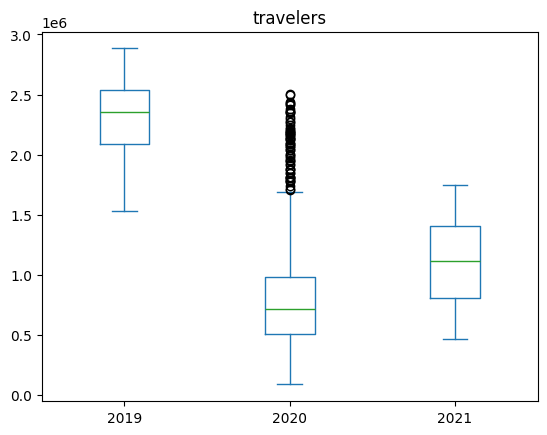

In [138]:
dfTsa = pd.read_csv("tsa_melted_holiday_travel.csv", parse_dates=True)
dfTsa.plot(kind='box', column=["travelers"], by=["year"])
# dfTsa.boxplot(column=["travelers"], by=["year"], kind='box')

#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

<Axes: xlabel='None-week_day', ylabel='month'>

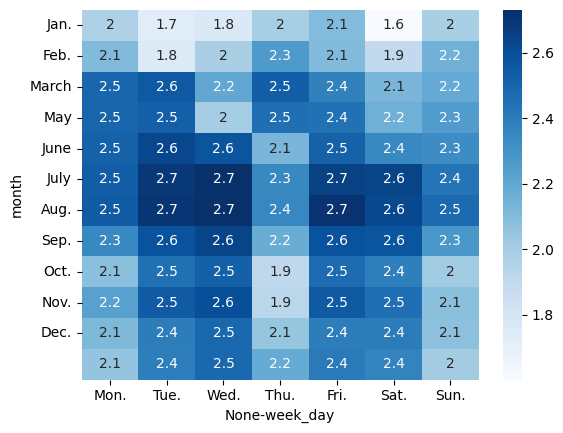

In [139]:
import seaborn as sns

working = pd.read_csv("tsa_melted_holiday_travel.csv", parse_dates=True)
# working.set_index('date', inplace=True) # unsere Idee, funktioniert aber nicht
working = pd.read_csv(
        'tsa_melted_holiday_travel.csv',
        parse_dates=True, index_col='date') # aus dem Internet, funktioniert. Warum bzw. wo der Unterschied zu uns liegt, ist nicht ganz klar.
    
year2019 = working.loc['2019']
year2019 = year2019.assign(week_day=lambda x: x.index.dayofweek + 1, month= lambda x: x.index.month)
year2019_pivot = year2019.pivot_table(
                                        values=['travelers'], 
                                        index=['month'], 
                                        columns=['week_day'], aggfunc='median'
)
sns.heatmap(data=year2019_pivot / 1e6, 
            cmap='Blues', 
            annot=True, 
            xticklabels=["Mon.", "Tue.", "Wed.", "Thu.", "Fri.", "Sat.", "Sun."],
            yticklabels=["Jan.", "Feb.", "March", "May", "June", "July", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."])

#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.

matplotlib.axes._axes.Axes

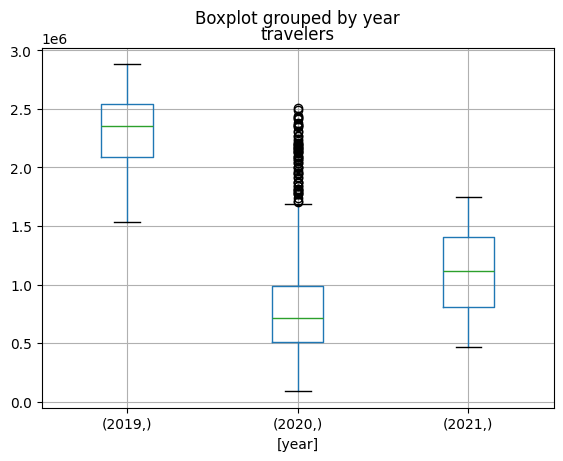

In [140]:
dfTsa = pd.read_csv("tsa_melted_holiday_travel.csv", parse_dates=True)
plot = dfTsa.boxplot(column=["travelers"], by=["year"], return_type=None)
type(plot)
# plot.get_xticklabels()